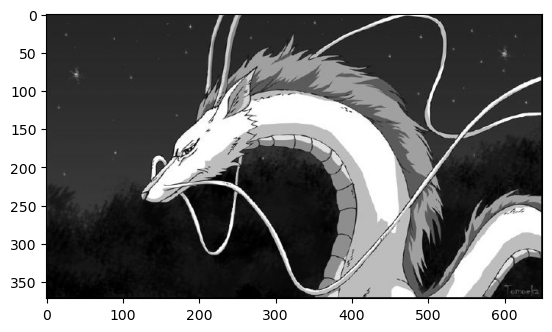

118.0


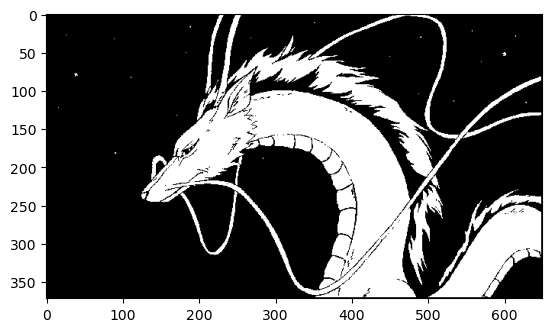

39


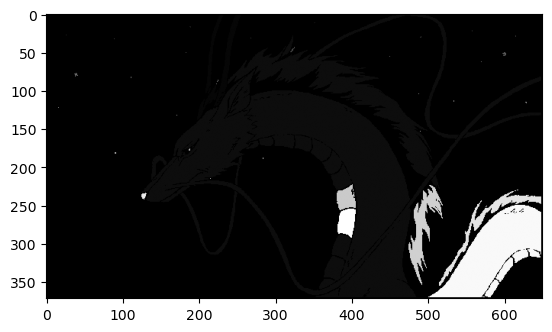

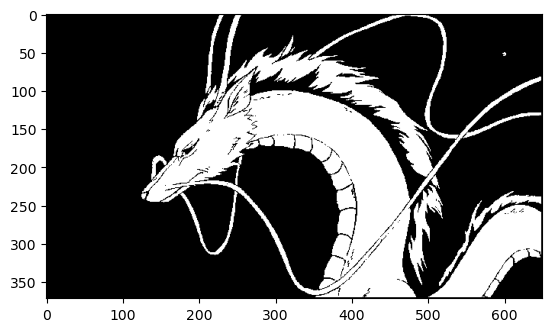

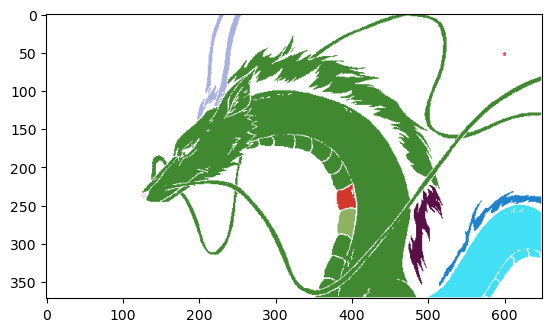

In [43]:
# 利用 Threshold 方法將影像做二元分類，並標記區域，以利區分區域來後續擷取特徵資料



import cv2
import matplotlib.pyplot as plt
import numpy


# 1. 先載入影像

img = cv2.imread("image\Haku.jpg",0)

plt.imshow(img,cmap="gray")

plt.show()



# 2. 利用 Threshold 演算法將圖片強度區分成兩群

thr , binary_img = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

print(thr)

plt.imshow(binary_img,cmap="gray")

plt.show()



# 3. 再利用 Two Pass CCL 來將影像區域標記

# CCL 一定要用 binary 的影像才能進行演算

# 物件要是白色，後景一律是黑色

n_regions , label_matrix = cv2.connectedComponents(binary_img)

print(n_regions)

plt.imshow(label_matrix,cmap="gray")

plt.show()



# 4. 選出前十大面積的區域


# a. 先做出區域標籤的統計陣列

sum_region = numpy.zeros(n_regions)


# b. 計算各區域的次數

for i in range(n_regions) : 

    sum_region[i] = numpy.sum(label_matrix==i)


# c. 將次數由大到小排名

# 用字典來做

sum_pair = dict(enumerate(sum_region))

# 用 items 來排序 , 還有 key 以 lamda 傳入每個 items 元素的 values 來做為排序依據

sort_sum_pair = sorted(sum_pair.items(),key=lambda item:item[1],reverse=True)

# 排序完會回傳 tuple of list

sort_sum = [item[0] for item in sort_sum_pair]

# 去掉 0 的區域

top_10_sum = sort_sum[1:11]


# d. 將前十名區域的強度保留下來，其他強度都是 0

binary_label_matrix = numpy.zeros_like(label_matrix)

select_label_matrix = numpy.zeros_like(label_matrix)

# 做一個前十名區域強度為 255 的矩陣，確認有去掉小區域

for i in top_10_sum : 

    binary_label_matrix[label_matrix==i] = 255

    select_label_matrix[label_matrix==i] = i

plt.imshow(binary_label_matrix,cmap="gray")

plt.show()



# 5. 將前十大標籤區域塗上色彩以利辨識

color_palatte = numpy.random.randint(0,255,size=(n_regions,3))

row = select_label_matrix.shape[0]

column = select_label_matrix.shape[1]

# 用 numpy.zeros 的產生方式會使矩陣的 0 是浮點數

# 要用 copy 或 zeroslike，或者指定為 numpy.int 系列，不然 cv2.cvtColor 會出錯

color_label_matrix = numpy.zeros((row,column,3),numpy.uint8)

color_label_matrix[:] = 255

for i in top_10_sum : 

    color_label_matrix[label_matrix==i] = color_palatte[i]

color_label_matrix_2 = cv2.cvtColor(color_label_matrix,cv2.COLOR_BGR2RGB)

plt.imshow(color_label_matrix_2)

plt.show()


